# Australian Population EDA

## About the Dataset

This data is taken from Australia Bureau of Statistics. It is Australia’s national statistical agency and an official source of independent, reliable information. They tell the real story of Australia, its economy and its people by bringing life and meaning to numbers.

This data contains statistics about the population and components of change (births, deaths, migration) for Australia and its states and territories covering between 01.06.1981 and 1.09.2020. Data was collected quarterly.

___ 

## About this notebook

This notebook consists of analysis and visualization of the provided data using SQL and various packages. With charts and queries, this notebook helps to analysie various aspects of Australian population since 1980.

### Tasks peformed in this notebook

1. Reading and adding the data into SQL DB as SQL tables.
2. Birth rate of Australia (1980 to 2020)
3. Death rate of Australia (1980 to 2020)
4. Death vs Birth rate of Australia (1980 to 2020)
5. Overseas arrival vs overseas departure chart
6. Data brief

### Packages/Libraries used

| S.No | Package/Libraries | Usage |
| --- | --- | --- |
| 1. | Pandas | Data manipulation and analysis |
| 2. | SQLITE | Lightweight SQL database |
| 3. | Plotly | Grpahs and Charts |
| 4. | Matplotlib | Graphs and Charts |
| 5. | Numpy | Linear algebra |

In [4]:
import pandas as pd
import sqlite3
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Reading the CSV files

data = pd.read_csv("Data/Australia Population.csv", sep = ";")

# Creating a SQL cnnection

conn = sqlite3.connect("auspop.db")

# Inserting the CSV file into SQL DB as a SQL Table

data.to_sql("population", conn)

In [7]:
pd.read_sql('select * from population;', conn)

,index,Date,Births,Deaths,Interstate Arrivals,Interstate Departures,Overseas Arrivals,Overseas Departures
0,0,1.06.1981,60300,26700,78000,78000,48200,19100
1,1,1.09.1981,61000,31500,76600,76600,50000,19100
2,2,1.12.1981,55000,25700,65900,65900,56700,21700
3,3,1.03.1982,60600,26100,70300,70300,58700,26300
4,4,1.06.1982,60500,27700,81700,81700,45300,20500
...,...,...,...,...,...,...,...,...
153,153,1.09.2019,78000,45800,86800,86800,164500,90000
154,154,1.12.2019,75300,41000,108600,108600,167300,114300
155,155,1.03.2020,75300,39900,87800,87800,163900,90000
156,156,1.06.2020,75500,40400,85500,85500,13800,20900


In [8]:
# Birth rate of Australia (1980 to 2020)

birth = pd.read_sql('select Date, Births from population order by Date;', conn)
px.line(birth, x="Date", y="Births", title="Birth rate of Australia (1980 to 2020)")

In [9]:
# Death rate of Australia (1980 to 2020)

death = pd.read_sql('select Date, Deaths from population order by Date;', conn)
px.line(death, x="Date", y="Deaths", title="Death rate of Australia (1980 to 2020)")

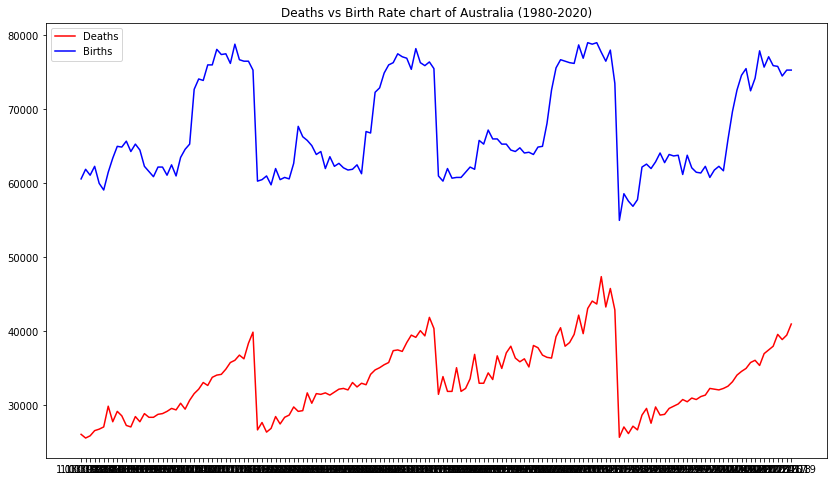

<Figure size 432x288 with 0 Axes>

In [23]:
# Deaths vs Birth Rate chart of Australia (1980-2020)

death_v_birth = pd.read_sql('select Date, Deaths, Births from population order by Date;', conn)

# PLotting the chart

x=death_v_birth["Date"].to_numpy()
y1=death_v_birth["Deaths"].to_numpy()
y2=death_v_birth["Births"].to_numpy()

plt.figure(figsize=[14, 8])
plt.plot(x, y1, label="Deaths", color="Red")
plt.plot(x, y2, label="Births", color="Blue")
plt.title("Deaths vs Birth Rate chart of Australia (1980-2020)")
plt.legend()
plt.show()

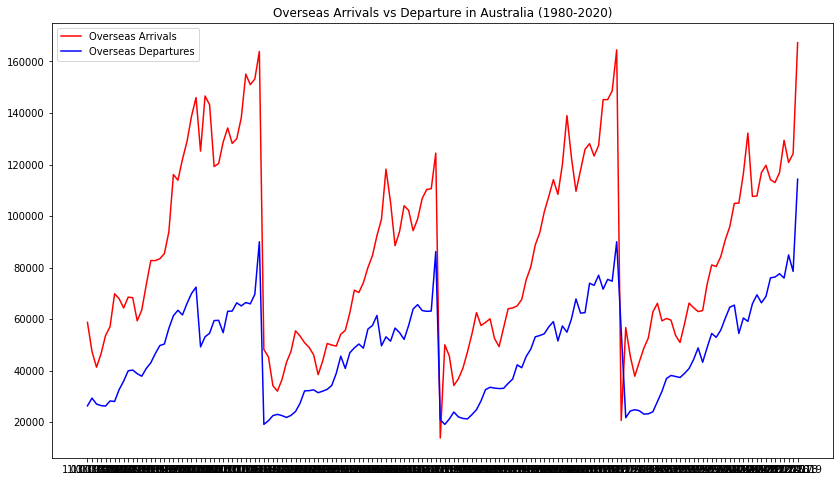

In [18]:
# Over-seas arrival vs Over-seas departure chart

oarr_dep = pd.read_sql('select Date, "Overseas Arrivals", "Overseas Departures" from population order by Date;', conn)

# Plotting the chart

x = oarr_dep["Date"].to_numpy()
y1 = oarr_dep["Overseas Arrivals"].to_numpy()
y2 = oarr_dep["Overseas Departures"].to_numpy()

plt.figure(figsize=[14,8])
plt.plot(x, y1, label="Overseas Arrivals", color="Red")
plt.plot(x, y2, label="Overseas Departures", color="Blue")
plt.legend()
plt.title("Overseas Arrivals vs Departure in Australia (1980-2020)")
plt.show()

In [19]:
# Data brief

brief = pd.read_sql('select avg(Births) as "Average Birth per annum", avg(Deaths) as "Average Death per annum", avg ("Overseas Arrivals") as "Average Overseas Arrivals per annum", avg("Overseas Departures") as "Average Overseas Departures per annum" from population;', conn)
brief

,Average Birth per annum,Average Death per annum,Average Overseas Arrivals per annum,Average Overseas Departures per annum
0,67484.810127,33391.772152,85744.936709,48284.810127


In [20]:
# Closing the connection

conn.close()